# Log Difference Plots
**Inset theory here**

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

INTENSITY_DATA_PATH = Path('../data/s_based_intensity_low_conc2.pkl')

intensity_data = pd.read_pickle(INTENSITY_DATA_PATH)
intensity_data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation
0,10,1.371004e+06,1.0,5.0,6.0,12.0,0.9,0.11,0.1
1,14,1.339709e+04,1.0,5.0,6.0,12.0,0.9,0.11,0.1
2,19,1.443702e+02,1.0,5.0,6.0,12.0,0.9,0.11,0.1
3,23,2.438575e+01,1.0,5.0,6.0,12.0,0.9,0.11,0.1
4,28,1.060799e+01,1.0,5.0,6.0,12.0,0.9,0.11,0.1


In [213]:
# Filter 2 points with 2 different Fetal Hb Conc., everything else remaining fixed
RAW_SIM_DATA_PATH = '/home/rraiyan/simulations/tfo_sim/data/raw_dan_iccps_equispace_detector/fa_1_wv_1_sa_0.1_ns_1_ms_2_ut_5.pkl'
raw_sim_data = pd.read_pickle(RAW_SIM_DATA_PATH)

In [214]:
from inverse_modelling_tfo.tools.name_decoder import decode_extended_filename
maternal_wall_thickness, uterus_thickness, wave_int = decode_extended_filename(RAW_SIM_DATA_PATH)

intensity_data = intensity_data[(intensity_data['Maternal Wall Thickness'] == maternal_wall_thickness) & (intensity_data['Wave Int'] == wave_int)]

In [215]:
intensity_data['Fetal Hb Concentration'].value_counts()

0.110    2500
0.125    2500
0.140    2500
0.155    2500
0.170    2500
Name: Fetal Hb Concentration, dtype: int64

In [216]:
test = intensity_data.groupby('Fetal Hb Concentration')

In [217]:
test.groups.keys()

dict_keys([0.11, 0.125, 0.14, 0.15500000000000003, 0.17])

In [218]:
MATERNAL_Hb = 12.
MATERNAL_SAT = 0.9
FETAL_SAT = 0.225
c1 = intensity_data[(intensity_data["Maternal Hb Concentration"] == MATERNAL_Hb) & (intensity_data["Maternal Saturation"] == MATERNAL_SAT) & (intensity_data["Fetal Saturation"] == FETAL_SAT) & (intensity_data["Fetal Hb Concentration"] == 0.110)]
c2 = intensity_data[(intensity_data["Maternal Hb Concentration"] == MATERNAL_Hb) & (intensity_data["Maternal Saturation"] == MATERNAL_SAT) & (intensity_data["Fetal Saturation"] == FETAL_SAT) & (intensity_data["Fetal Hb Concentration"] == 0.125)]
c3 = intensity_data[(intensity_data["Maternal Hb Concentration"] == MATERNAL_Hb) & (intensity_data["Maternal Saturation"] == MATERNAL_SAT) & (intensity_data["Fetal Saturation"] == FETAL_SAT) & (intensity_data["Fetal Hb Concentration"] == 0.14)]
c4 = intensity_data[(intensity_data["Maternal Hb Concentration"] == MATERNAL_Hb) & (intensity_data["Maternal Saturation"] == MATERNAL_SAT) & (intensity_data["Fetal Saturation"] == FETAL_SAT) & (intensity_data["Fetal Hb Concentration"] == 0.15500000000000003)]
c5 = intensity_data[(intensity_data["Maternal Hb Concentration"] == MATERNAL_Hb) & (intensity_data["Maternal Saturation"] == MATERNAL_SAT) & (intensity_data["Fetal Saturation"] == FETAL_SAT) & (intensity_data["Fetal Hb Concentration"] == 0.17)]

In [219]:
i1 = c1["Intensity"].to_numpy()
i2 = c2["Intensity"].to_numpy()
i3 = c3["Intensity"].to_numpy()
i4 = c4["Intensity"].to_numpy()
i5 = c5["Intensity"].to_numpy()

In [220]:
log_diff1 = np.log(i1) - np.log(i2)
log_diff2 = np.log(i1) - np.log(i3)
log_diff3 = np.log(i1) - np.log(i4)
log_diff4 = np.log(i1) - np.log(i5)

In [221]:
# raw_sim_data['SDD'] = raw_sim_data['X'] - 100.
# raw_sim_data.drop(columns=['X', 'Y', 'Z'], inplace=True)

In [222]:
# raw_sim_data['Path'] = raw_sim_data['L1 ppath'] + raw_sim_data['L2 ppath'] + raw_sim_data['L3 ppath'] + raw_sim_data['L4 ppath']

In [223]:
# sum_L = raw_sim_data.groupby('SDD')['L4 ppath'].mean()
# sum_L = raw_sim_data.groupby('SDD')['Path'].mean()

In [224]:
# plt.figure()
# plt.plot(sum_L)
# plt.ylabel('$\sum L_4$')
# # plt.ylabel(r'$\mathbb{E}\{L_4\}$')
# plt.xlabel('SDD (mm)')
# plt.show()

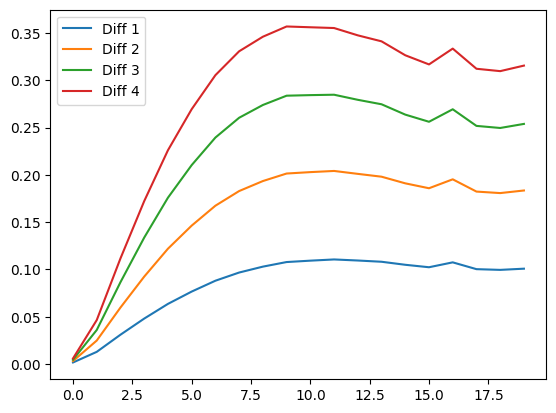

In [225]:
# plt.plot(sum_L.index, log_diff/sum_L.values)
# plt.plot(sum_L.index, 1/sum_L.to_numpy())
plt.figure()
plt.plot(log_diff1, label='Diff 1')
plt.plot(log_diff2, label='Diff 2')
plt.plot(log_diff3, label='Diff 3')
plt.plot(log_diff4, label='Diff 4')
plt.legend()
plt.show()

__Remarks__ : This approach disregrads the fundemental theory that we cannot pull a log inside a sum. More specificially,
$$
log(\sum x_i) \neq \sum(log(x_i))
$$
Our intensities are made up off sum of intensities of individual photons. Taking the log intensity gives us the term on the left as Log Intensity. 